# Customer Segmentation

RFM analysis is a marketing technique used to quantitatively rank and
group customers based on the recency, frequency and monetary total of
their recent transactions to identify the best customers and perform
targeted marketing campaigns. The system assigns each customer numerical
scores based on these factors to provide an objective analysis. RFM
analysis is based on the marketing adage that "80% of your business
comes from 20% of your customers."

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 190)


In [2]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [3]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,52

In [4]:
empty_columns = df.columns[df.isnull().all()]  #Tüm satırları boş olan sütunlar
df.drop(empty_columns, axis=1, inplace=True)  

In [5]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.material        3392
Products.arm_style       4039
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Length: 147, dtype: int64

In [6]:
bos=df.isnull().sum()
cok_bos=bos[bos>3000]

In [7]:
df.drop(cok_bos.index,axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.mailing              2114 non-null   float64
 5   Customers.last_modified        4194 non-null   int64  
 6   Customers.customer_type        3771 non-null   float64
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.fname                   4194 non-null   object 
 10  Orders.lname                   4194 non-null   object 
 11  Orders.order_number            4194 non-null   object 
 12  Orders.currency                4194 non-null   o

In [9]:
bos=df.isnull().sum()
bos[bos>0]

Customers.mailing           2080
Customers.customer_type      423
Orders.tax                   457
Orders.shipping              195
Orders.shipping_carrier      617
                            ... 
Products.shipping_width      196
Products.shipping_height     196
Products.size               2751
Products.family_id           325
Products.saved_status        264
Length: 74, dtype: int64

In [10]:
for i in bos[bos>0].index:
    print(i)
    print(df[i].isnull().sum())

Customers.mailing
2080
Customers.customer_type
423
Orders.tax
457
Orders.shipping
195
Orders.shipping_carrier
617
Orders.shipping_method
443
Orders.tracking
376
Orders.payment_status
5
Orders.payment_date
18
Orders.payment_user
2814
Orders.payment_type
384
Orders.payment_amount
18
Orders.payment_id
430
Orders.payment_code
748
Orders.updated_date
23
Orders.shipped_date
346
Orders.notes
2918
Orders.customer_type
183
Order_Items.product_id
43
Order_Items.cost
3
Products.id
157
Products.status
157
Products.template
221
Products.vendor
157
Products.import_id
157
Products.name
157
Products.display_name
532
Products.list_price
177
Products.price
158
Products.cost
157
Products.flags
1207
Products.left_flag
2955
Products.last_modified
157
Products.taxable
1235
Products.shopping_gtin
1064
Products.shopping_brand
162
Products.shopping_mpn
160
Products.shopping_color
2494
Products.shopping_flags
277
Products.amazon_asin
1259
Products.amazon_item_type
179
Products.google_shopping_id
414
Products.go

In [11]:
df['Products.cost'].value_counts()

Products.cost
97.00     136
15.50      97
44.94      72
50.03      53
152.00     52
         ... 
49.92       1
32.00       1
52.11       1
281.79      1
675.00      1
Name: count, Length: 1225, dtype: int64

In [12]:
Customers = df[['Customers.id', 'Customers.create_date', 'Customers.mailing', 'Customers.customer_type']]
Products = df[['Products.price','Products.cost', 'Products.status']]
Orders = df[['Orders.id', 'Orders.status','Orders.payment_status','Orders.shipping', 'Orders.payment_date','Orders.payment_amount','Orders.subtotal','Orders.total']]

In [13]:
Customers

,Customers.id,Customers.create_date,Customers.mailing,Customers.customer_type
0,797,1426018724,NaN,0.0
1,3,1386089139,NaN,0.0
2,3,1386089139,NaN,0.0
3,4,1386780263,NaN,0.0
4,5,1386861599,0.0,0.0
...,...,...,...,...
4189,3730,1463408698,1.0,0.0
4190,3732,1463412756,NaN,NaN
4191,3733,1463413245,NaN,NaN
4192,3735,1463416687,1.0,NaN


In [14]:
Customers.isnull().sum()

Customers.id                  0
Customers.create_date         0
Customers.mailing          2080
Customers.customer_type     423
dtype: int64

In [15]:
Customers['Customers.mailing']=Customers['Customers.mailing'].fillna(Customers['Customers.mailing'].mode()[0])
Customers['Customers.customer_type']=Customers['Customers.customer_type'].fillna(Customers['Customers.customer_type'].mode()[0])

In [16]:
Products

,Products.price,Products.cost,Products.status
0,57.64,44.00,0.0
1,10.29,1.87,1.0
2,68.78,52.50,0.0
3,19.56,12.62,0.0
4,36.05,25.75,1.0
...,...,...,...
4189,23.65,15.50,3.0
4190,69.99,28.16,3.0
4191,1099.00,675.00,3.0
4192,129.99,91.00,3.0


In [17]:
Products.isnull().sum()

Products.price     158
Products.cost      157
Products.status    157
dtype: int64

In [18]:
Products['Products.status']=Products['Products.status'].fillna(df['Products.status'].mode()[0])

In [19]:
for col in Products.columns:
    Products[col] = Products[col].fillna(Products[col].mean())

In [20]:
Products.isnull().sum()

Products.price     0
Products.cost      0
Products.status    0
dtype: int64

In [21]:
Orders

,Orders.id,Orders.status,Orders.payment_status,Orders.shipping,Orders.payment_date,Orders.payment_amount,Orders.subtotal,Orders.total
0,3758,1,3.0,9.95,1.426019e+09,64.29,57.20,64.29
1,23,1,3.0,9.99,1.386090e+09,29.99,20.00,29.99
2,9531,3,3.0,9.95,1.449604e+09,78.73,68.78,78.73
3,29,1,3.0,9.95,1.386780e+09,29.55,19.56,29.55
4,30,1,3.0,9.95,1.386862e+09,46.00,36.05,46.00
...,...,...,...,...,...,...,...,...
4189,17421,0,3.0,0.00,1.463409e+09,16.06,14.85,16.06
4190,17425,0,1.0,NaN,1.463413e+09,39.99,39.99,39.99
4191,17426,5,1.0,NaN,1.463413e+09,989.10,1099.00,989.10
4192,17431,0,3.0,0.00,1.463417e+09,129.99,129.99,129.99


In [22]:
Orders.isnull().sum()

Orders.id                  0
Orders.status              0
Orders.payment_status      5
Orders.shipping          195
Orders.payment_date       18
Orders.payment_amount     18
Orders.subtotal            0
Orders.total               0
dtype: int64

In [23]:
for col in Orders.columns:
    Orders[col] = Orders[col].fillna(Orders[col].mode()[0])

In [24]:
Orders.isnull().sum()

Orders.id                0
Orders.status            0
Orders.payment_status    0
Orders.shipping          0
Orders.payment_date      0
Orders.payment_amount    0
Orders.subtotal          0
Orders.total             0
dtype: int64

In [25]:
import sqlite3

In [26]:
df=pd.DataFrame(Customers)
conn=sqlite3.connect('customersn.db')
df.to_sql('customers',conn,index=False,if_exists='replace')
conn.close()

In [27]:
df=pd.DataFrame(Products)
conn=sqlite3.connect('productsn.db')
df.to_sql('products',conn,index=False,if_exists='replace')
conn.close()

In [28]:
df=pd.DataFrame(Orders)
conn=sqlite3.connect('ordersn.db')
df.to_sql('orders',conn,index=False,if_exists='replace')
conn.close()

In [29]:
df1=pd.concat([Customers,Products,Orders],axis=1)

In [30]:
x=df1

In [31]:
#wcss=within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.6260879645717081
0.5962526623572929
0.563969856086476
0.5119294999932695
0.5362487492017327
0.5221412597771911
0.5148293517795934
0.5266489216143918


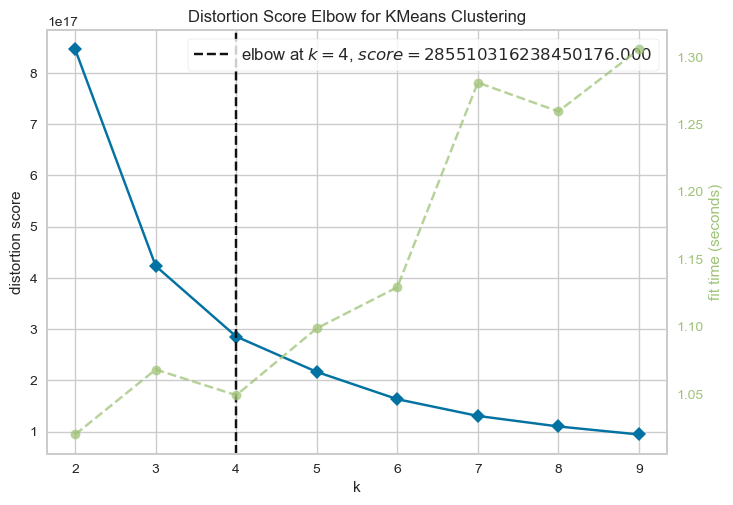

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10)) 
vis.fit(x)
vis.show()

In [33]:
model=KMeans(4)
model=model.fit(x)
tahmin=model.predict(x)
tahmin

array([3, 1, 3, ..., 0, 0, 0])

In [34]:
x['cluster']=tahmin
x.head()

,Customers.id,Customers.create_date,Customers.mailing,Customers.customer_type,Products.price,Products.cost,Products.status,Orders.id,Orders.status,Orders.payment_status,Orders.shipping,Orders.payment_date,Orders.payment_amount,Orders.subtotal,Orders.total,cluster
0,797,1426018724,1.0,0.0,57.64,44.00,0.0,3758,1,3.0,9.95,1.426019e+09,64.29,57.20,64.29,3
1,3,1386089139,1.0,0.0,10.29,1.87,1.0,23,1,3.0,9.99,1.386090e+09,29.99,20.00,29.99,1
2,3,1386089139,1.0,0.0,68.78,52.50,0.0,9531,3,3.0,9.95,1.449604e+09,78.73,68.78,78.73,3
3,4,1386780263,1.0,0.0,19.56,12.62,0.0,29,1,3.0,9.95,1.386780e+09,29.55,19.56,29.55,1
4,5,1386861599,0.0,0.0,36.05,25.75,1.0,30,1,3.0,9.95,1.386862e+09,46.00,36.05,46.00,1


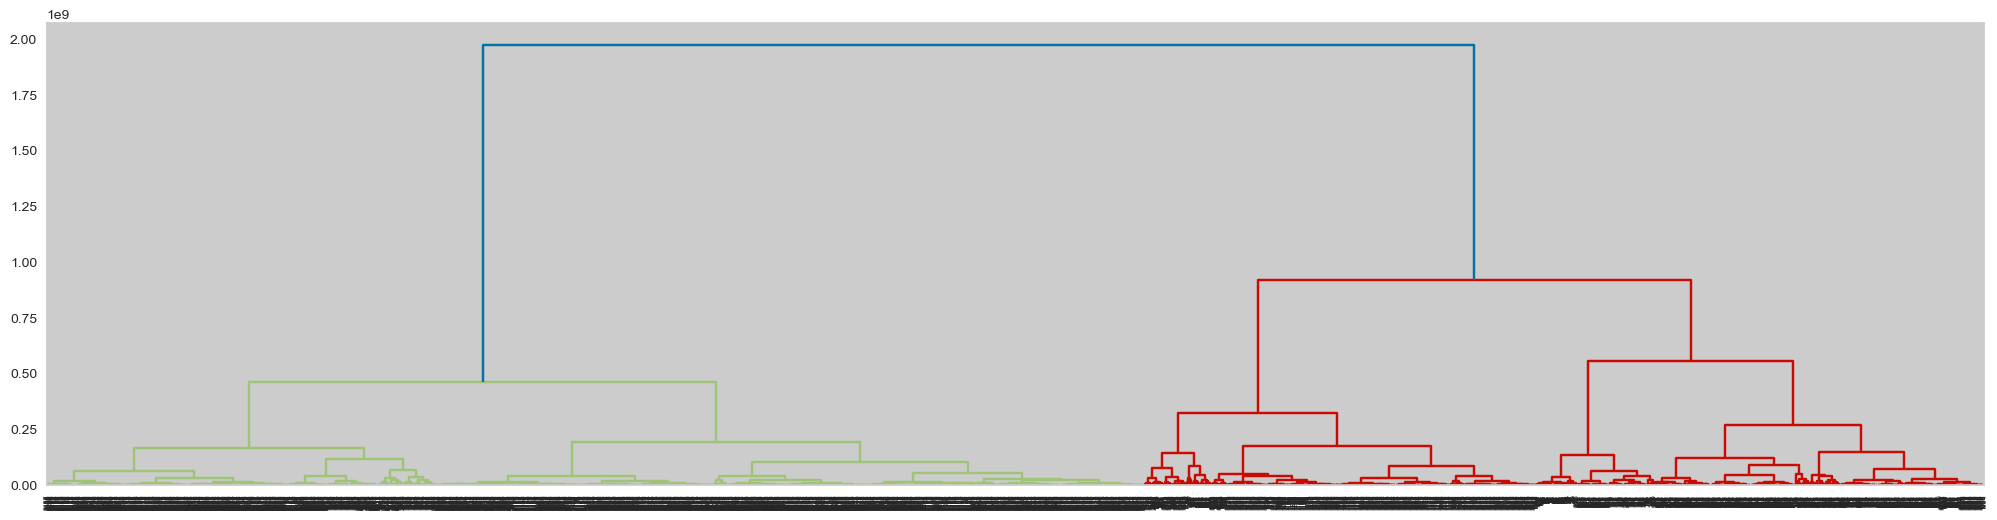

In [35]:
data=linkage(x,method='ward',metric='euclidean')
plt.figure(figsize=(25,6))
dendrogram(data);

In [36]:
x['Customers.create_date'] = pd.to_datetime(x['Customers.create_date'], unit='s')
x['Orders.payment_date'] = pd.to_datetime(x['Orders.payment_date'], unit='s')

In [37]:
df=x
df['CustomerID']=x['Customers.id']

In [38]:
df

,Customers.id,Customers.create_date,Customers.mailing,Customers.customer_type,Products.price,Products.cost,Products.status,Orders.id,Orders.status,Orders.payment_status,Orders.shipping,Orders.payment_date,Orders.payment_amount,Orders.subtotal,Orders.total,cluster,CustomerID
0,797,2015-03-10 20:18:44,1.0,0.0,57.64,44.00,0.0,3758,1,3.0,9.95,2015-03-10 20:24:59,64.29,57.20,64.29,3,797
1,3,2013-12-03 16:45:39,1.0,0.0,10.29,1.87,1.0,23,1,3.0,9.99,2013-12-03 17:07:35,29.99,20.00,29.99,1,3
2,3,2013-12-03 16:45:39,1.0,0.0,68.78,52.50,0.0,9531,3,3.0,9.95,2015-12-08 19:40:52,78.73,68.78,78.73,3,3
3,4,2013-12-11 16:44:23,1.0,0.0,19.56,12.62,0.0,29,1,3.0,9.95,2013-12-11 16:44:23,29.55,19.56,29.55,1,4
4,5,2013-12-12 15:19:59,0.0,0.0,36.05,25.75,1.0,30,1,3.0,9.95,2013-12-12 15:19:59,46.00,36.05,46.00,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,2016-05-16 14:24:58,1.0,0.0,23.65,15.50,3.0,17421,0,3.0,0.00,2016-05-16 14:27:34,16.06,14.85,16.06,0,3730
4190,3732,2016-05-16 15:32:36,1.0,0.0,69.99,28.16,3.0,17425,0,1.0,9.95,2016-05-16 15:32:37,39.99,39.99,39.99,0,3732
4191,3733,2016-05-16 15:40:45,1.0,0.0,1099.00,675.00,3.0,17426,5,1.0,9.95,2016-05-16 15:40:46,989.10,1099.00,989.10,0,3733
4192,3735,2016-05-16 16:38:07,1.0,0.0,129.99,91.00,3.0,17431,0,3.0,0.00,2016-05-16 16:38:14,129.99,129.99,129.99,0,3735


In [39]:
# Calculate recency, frequency, and monetary values
now = pd.to_datetime('2024-05-02')
recency = now - df.groupby('CustomerID')['Orders.payment_date'].max()
recency = recency.dt.days
frequency = df.groupby('CustomerID')['Orders.payment_date'].count()
monetary = df.groupby('CustomerID')['Orders.payment_amount'].sum()

In [40]:
# Create an RFM DataFrame
rfm_df = pd.DataFrame({
'Recency': recency,
'Frequency': frequency,
'Monetary': monetary
})
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
3,3067,2,108.72
4,3794,1,29.55
5,2925,3,200.57
7,3778,1,49.14
8,3761,1,69.70
...,...,...,...
3730,2907,1,16.06
3732,2907,1,39.99
3733,2907,1,989.10
